# Parcial: Ciencia de Datos en R  (_10/6/2017_) [Martin A. Miguel | 181/09]

In [98]:
dataset_hongos_clasificados = 'http://www.ic.fcen.uba.ar/~anab/hongos_clasificados.txt'
dataset_hongos_alturas = 'http://www.ic.fcen.uba.ar/~anab/alturas.txt'
dataset_mediciones = 'http://www.ic.fcen.uba.ar/~anab/mediciones.txt'

## Ejercicio 1

In [82]:
hongos.X.I.mu = 4
hongos.X.I.sigma = sqrt(1)
hongos.X.I.sigmaSQ = 1
hongos.X.I.d = function(x) { dnorm(x, hongos.I.mu, hongos.I.sigma)}
hongos.X.I.p = 0.4
hongos.X.II.mu = 8
hongos.X.II.sigma = sqrt(4)
hongos.X.II.sigmaSQ = 4
hongos.X.II.d = function(x) { dnorm(x, hongos.II.mu, hongos.II.sigma)}
hongos.X.II.p = 0.6

### Ej 1.1

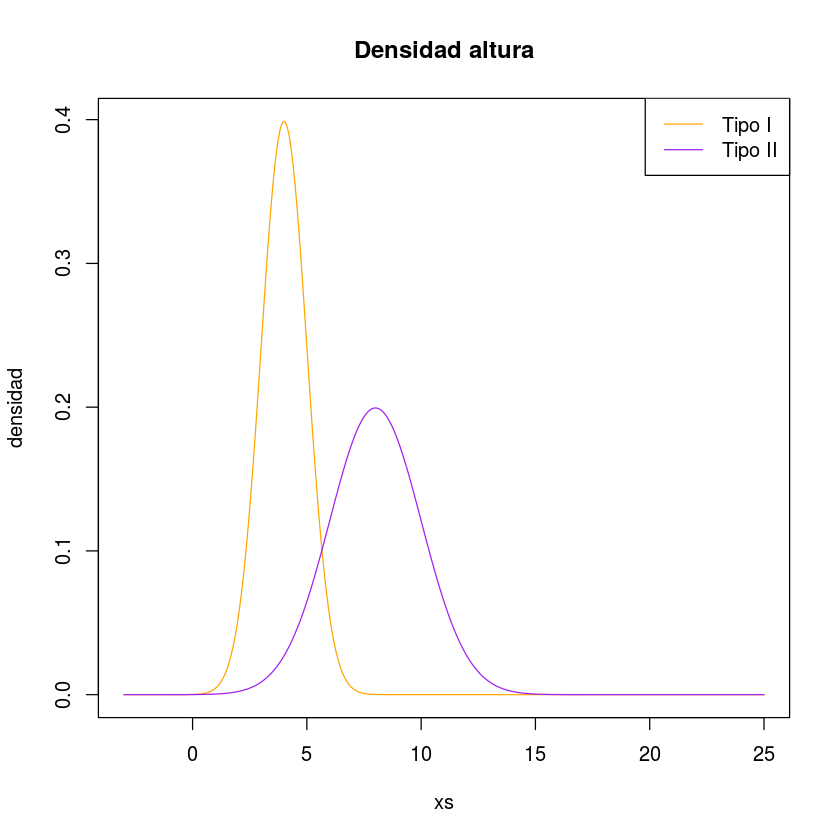

In [83]:
xs = seq(-3, 25, length.out=300)
ylim = c(0, 0.5)
plot(xs, hongos.X.I.d(xs), type='l', main='Densidad altura', ylab='densidad', col='orange')
lines(xs, hongos.X.II.d(xs), type='l', col='purple')
legend('topright', legend=c('Tipo I', 'Tipo II'), lty=rep(1, 3), lwd=rep(1, 3), col=c('orange', 'purple'))

### Ej 1.2

In [84]:
pnorm(3, hongos.X.I.mu, hongos.X.I.sigma)

[1] 0.1586553

### Ej 1.3

In [85]:
pMenor3 = pnorm(3, hongos.X.I.mu, hongos.X.I.sigma) * hongos.X.I.p + pnorm(3, hongos.X.II.mu, hongos.X.II.sigma) * hongos.X.II.p
pMenor3

[1] 0.0671879

### Ej 1.4

In [86]:
pTipoI_siXMenor3 = (pnorm(3, hongos.X.I.mu, hongos.X.I.sigma) * hongos.X.I.p) / pMenor3
pTipoI_siXMenor3

[1] 0.9445466

### Ej 1.5

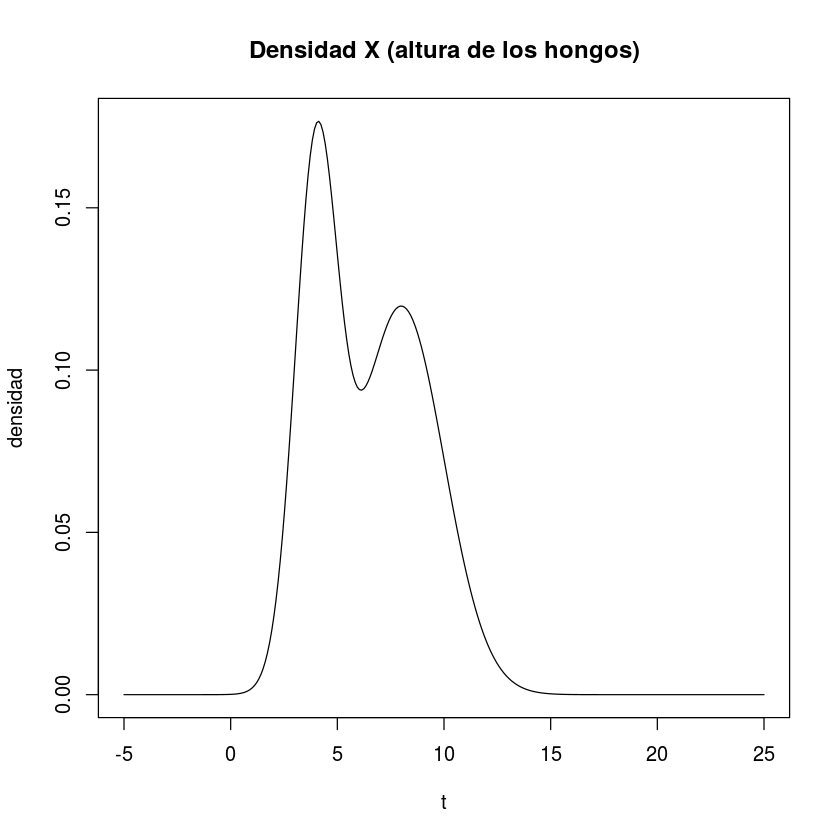

In [87]:
dalturaX = function(t) {
    return (hongos.X.I.d(t) * hongos.X.I.p + hongos.X.II.d(t) * hongos.X.II.p)
}
xs = seq(-5, 25, length.out=300)
plot(xs, dalturaX(xs), main='Densidad X (altura de los hongos)', ylab='densidad', xlab='t', type='l')

### Ej 1.6

In [88]:
ralturaX = function(n) {
    choices = sample(x=c(1, 2), size=n, replace=T)
    mus = c(hongos.X.I.mu, hongos.X.II.mu)[choices]
    sigmas = c(hongos.X.I.sigma, hongos.X.II.sigma)[choices]
    ret = sapply(1:n, function(n_idx) {rnorm(1, mus[n_idx], sigmas[n_idx])})
}

### Ej 1.7

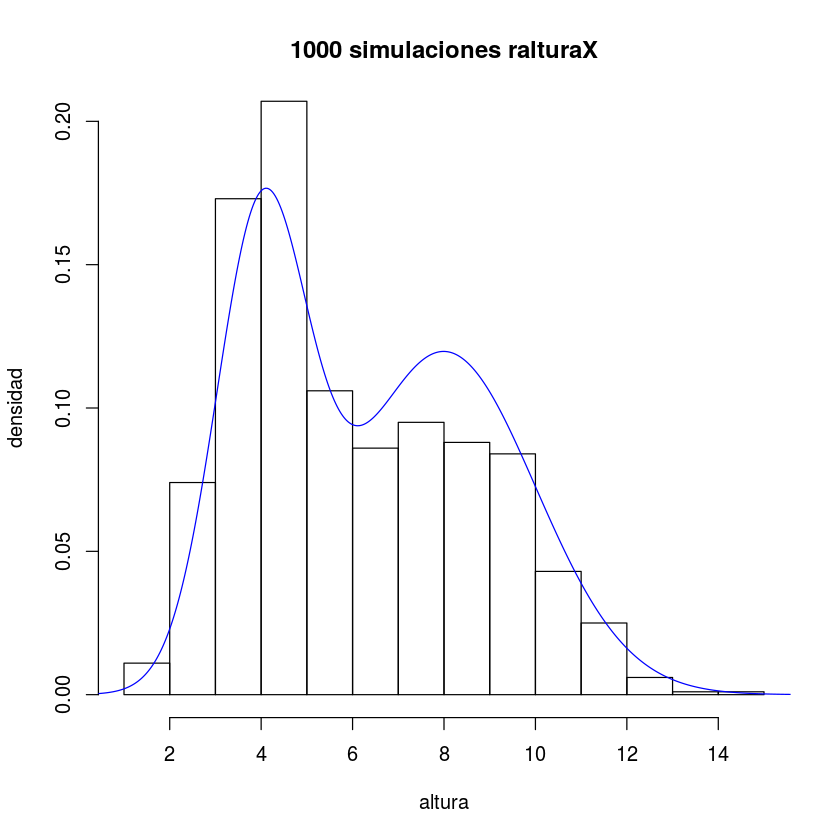

In [89]:
set.seed(123)
hist(ralturaX(1000), freq=F, ylim=c(0, 0.2), main='1000 simulaciones ralturaX', xlab='altura', ylab='densidad')
xs = seq(-5, 25, length.out=1000)
lines(xs, dalturaX(xs), col='blue')

In [99]:
### Ej 1.8
class.optim.variedad = function(t) {
    # ret == 1 si clasifica a tipo 1 o 2 si clasifica a tipo 2
    prob_tI = hongos.X.I.d(t) * hongos.X.I.p
    prob_tII = hongos.X.II.d(t) * hongos.X.II.p
    return ((prob_tII > prob_tI) + 1)
}
hongos.data = read.table(dataset_hongos_clasificados, header=T)
head(hongos.data)
hongos.data.n = length(hongos.data[,1])
preds = sapply(1:hongos.data.n, function(n_idx) {class.optim.variedad(hongos.data[n_idx, 1])})
expected = hongos.data[,2]
hongos.class.mean_error = mean(preds != expected)
print(c('Error empírico medio:', hongos.class.mean_error), sep='', quote=F)

Height,Variety
6.992,2
5.052,2
5.639,1
6.803,2
4.784,1
3.960,1


[1] Error empírico medio: 0.086                


### Ej 1.9

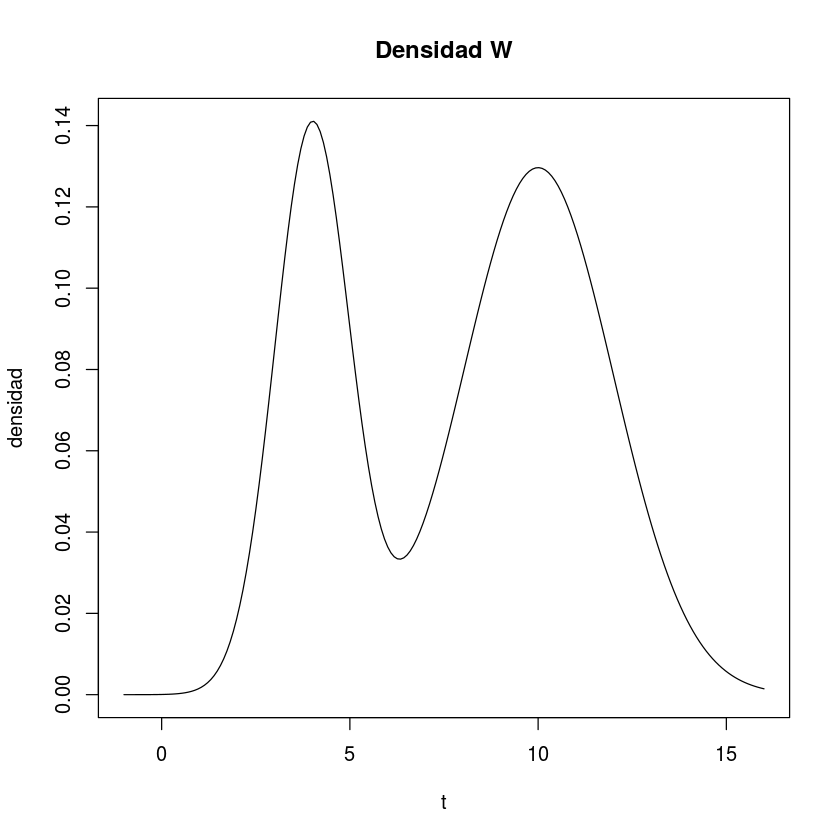

In [97]:
hongos.W.I.p = 0.35
hongos.W.I.mu = hongos.X.I.mu
hongos.W.I.sigma = hongos.X.I.sigma
hongos.W.III.p = 0.65
hongos.W.III.mu = 10
hongos.W.III.sigma = sqrt(4)
dalturaW = function(t) {
    (dnorm(t, hongos.W.I.mu, hongos.W.I.sigma) * hongos.W.I.p+ 
     dnorm(t, hongos.W.III.mu, hongos.W.III.sigma) * hongos.W.III.p)
}
xs = seq(-1, 16, length.out=200)
plot(xs, dalturaW(xs), main='Densidad W', xlab='t', ylab='densidad', type='l')
#lines(xs, dnorm(xs, hongos.W.I.mu, hongos.W.I.sigma) * hongos.W.I.p, col='orange')
#lines(xs, dnorm(xs, hongos.W.III.mu, hongos.W.III.sigma) * hongos.W.III.p, col='cyan')

### Ej 1.10

[1] Log-likelihood X: 34.6629610049307 
[1] Log-likelihood W: 27.4999781884555 


[1] "Tanto visualmente como en log-like, es más razonable que el bosque se comporte como X"

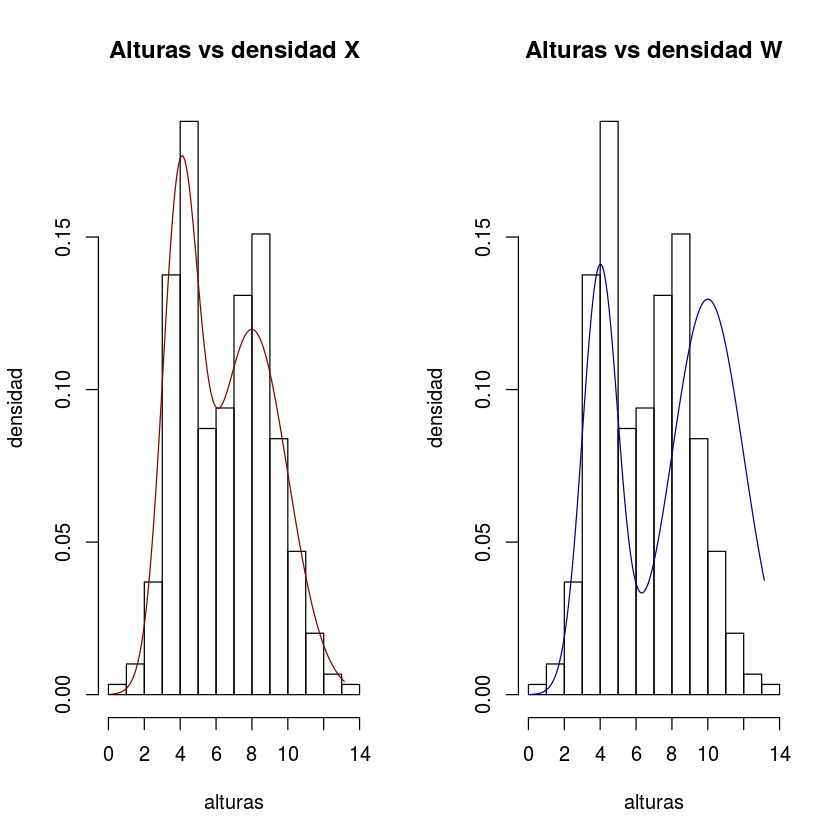

In [113]:
hongos.alturas = read.table(dataset_hongos_alturas, header=T)[,1]
xs = seq(min(hongos.alturas), max(hongos.alturas), length.out=200)
par(mfrow=c(1, 2))
hist(hongos.alturas, freq=F, main='Alturas vs densidad X', ylab='densidad', xlab='alturas')
lines(xs, dalturaX(xs), col='darkred')
hist(hongos.alturas, freq=F, main='Alturas vs densidad W', ylab='densidad', xlab='alturas')
lines(xs, dalturaW(xs), col='darkblue')

bosque.log_like.X = sum(sapply(hongos.alturas, dalturaX))
bosque.log_like.W = sum(sapply(hongos.alturas, dalturaW))
print(c('Log-likelihood X:', bosque.log_like.X), quote=F, sep='')
print(c('Log-likelihood W:', bosque.log_like.W), quote=F, sep='')
'Tanto visualmente como en log-like, es más razonable que el bosque se comporte como X'

## Ejercicio 2

### Ej 2.1

In [121]:
est.mediana = median
est.media = mean

### Ej 2.2
El eje de simetría de X ~ N(0, 1) es $\eta$ = 0

#### Ej 2.2.a

In [125]:
ns = c(30, 50, 100, 500)
Nrep = 1000
est.mediana.sim = lapply(1:length(ns), function(n_idx) {
    n = ns[n_idx]
    mediana.ma = sapply(1:Nrep, function(rep_idx) {
        est.mediana(rnorm(n, 0, 1))
    })
    mediana.ma
})
est.media.sim = lapply(1:length(ns), function(n_idx) {
    n = ns[n_idx]
    media.ma = sapply(1:Nrep, function(rep_idx) {
        est.media(rnorm(n, 0, 1))
    })
    media.ma
})

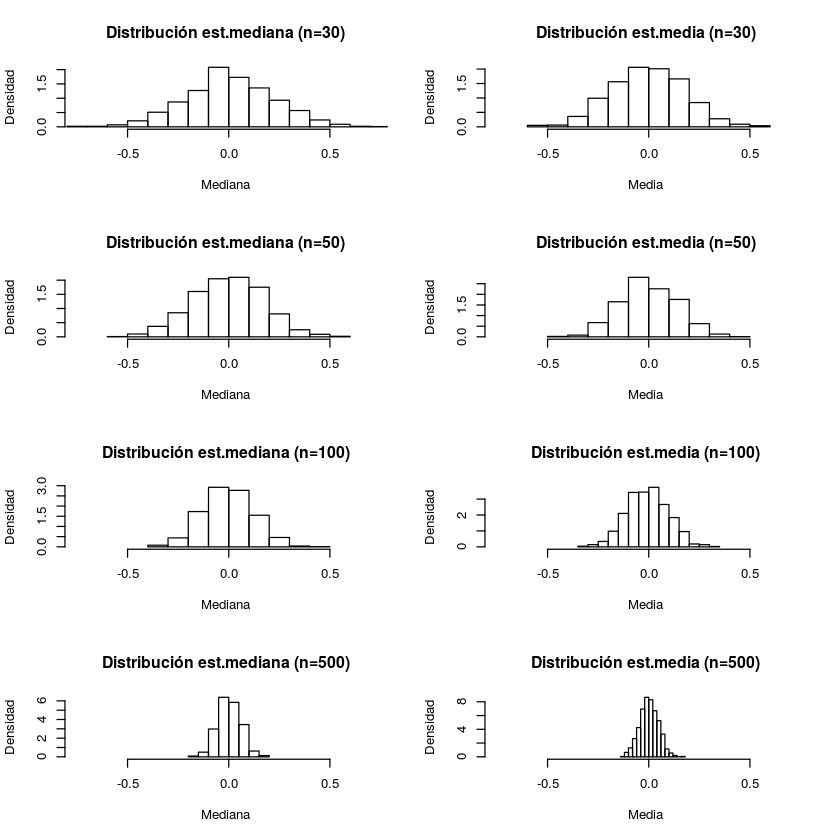

In [128]:
par(mfrow=c(4, 2))
xlims = c(min(unlist(est.mediana.sim)), max(unlist(est.mediana.sim)))
for (r_idx in 1:4) {
    n = ns[r_idx]
    mediana.title = sprintf('Distribución est.mediana (n=%d)', n)
    hist(est.mediana.sim[[r_idx]], freq=F, ylab='Densidad', xlab='Mediana', main=mediana.title, xlim=xlims)
    media.title = sprintf('Distribución est.media (n=%d)', n)
    hist(est.media.sim[[r_idx]], freq=F, ylab='Densidad', xlab='Media', main=media.title, xlim=xlims)
}

El estimador $\hat{\eta_n}$ (est.mediana) parecería ser normal, aunque tiene más problemas en converger que $\tilde{\eta_n}$ (est.media).
$\tilde{\eta_n}$ se distribuye de forma normal desde la teoría.

#### Ej 2.2.b

In [132]:
est.mse.sim = matrix(nrow=2, ncol=length(ns))
est.mse.sim = data.frame(est.mse.sim)
rownames(est.mse.sim) = c('est.mediana', 'est.media')
colnames(est.mse.sim) = sapply(ns, function(n) {sprintf('n=%d', n)})

for (c_idx in 1:length(ns)) {  
    # Aprovecha que el valor esperado es 0 toma los valores estimados
    # de mediana y media como el error.
    est.mse.sim[1, c_idx] = mean(est.mediana.sim[[c_idx]] ** 2)
    est.mse.sim[2, c_idx] = mean(est.media.sim[[c_idx]] ** 2)
}
est.mse.sim

,n=30,n=50,n=100,n=500
est.mediana,0.04687069,0.03020706,0.01526864,0.003205803
est.media,0.03296176,0.01949057,0.01041440,0.002092879


### Ej 2.3

#### Ej 2.3.a

El eje de simetría para $X \tilde{} C(0, 1)$ es $\eta$ = 0

In [133]:
ns = c(30, 50, 100, 500)
Nrep = 1000
est.mediana.sim = lapply(1:length(ns), function(n_idx) {
    n = ns[n_idx]
    mediana.ma = sapply(1:Nrep, function(rep_idx) {
        est.mediana(rcauchy(n))
    })
    mediana.ma
})
est.media.sim = lapply(1:length(ns), function(n_idx) {
    n = ns[n_idx]
    media.ma = sapply(1:Nrep, function(rep_idx) {
        est.media(rcauchy(n))
    })
    media.ma
})

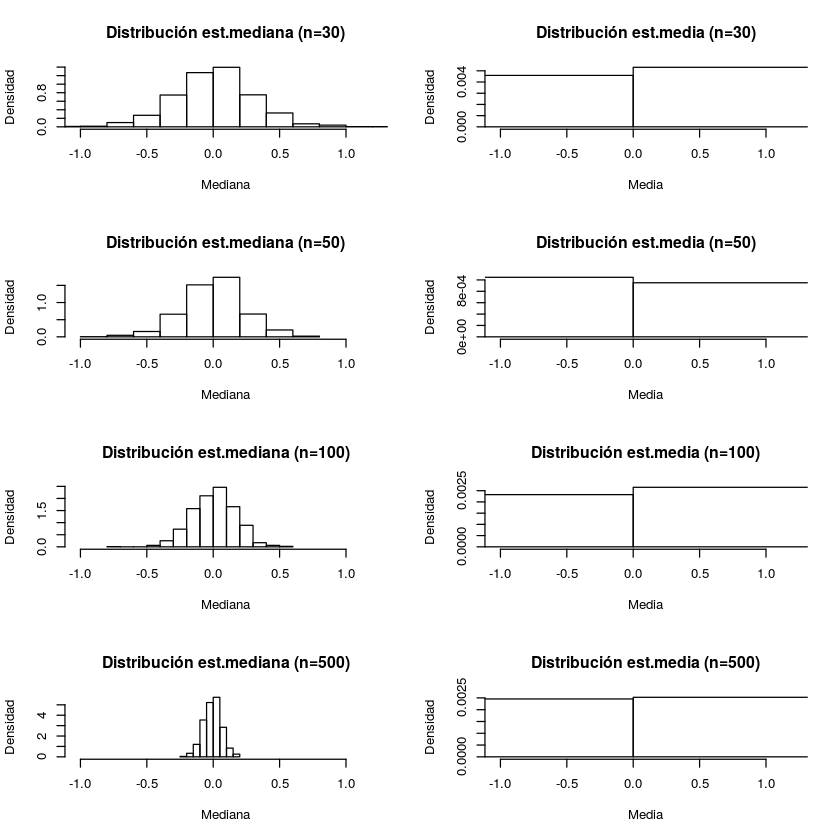

In [134]:
par(mfrow=c(4, 2))
xlims = c(min(unlist(est.mediana.sim)), max(unlist(est.mediana.sim)))
for (r_idx in 1:4) {
    n = ns[r_idx]
    mediana.title = sprintf('Distribución est.mediana (n=%d)', n)
    hist(est.mediana.sim[[r_idx]], freq=F, ylab='Densidad', xlab='Mediana', main=mediana.title, xlim=xlims)
    media.title = sprintf('Distribución est.media (n=%d)', n)
    hist(est.media.sim[[r_idx]], freq=F, ylab='Densidad', xlab='Media', main=media.title, xlim=xlims)
}

La distribución de $\hat{\eta_n}$ aparenta ser normal. 
La distribución de $\tilde{\eta_n}$ no aparenta ser normal y de hecho $\tilde{\eta_n} \tilde{} C(0,1)$.

In [136]:
est.mse.sim = matrix(nrow=2, ncol=length(ns))
est.mse.sim = data.frame(est.mse.sim)
rownames(est.mse.sim) = c('est.mediana', 'est.media')
colnames(est.mse.sim) = sapply(ns, function(n) {sprintf('n=%d', n)})

for (c_idx in 1:length(ns)) {  
    # Aprovecha que el valor esperado es 0 toma los valores estimados
    # de mediana y media como el error.
    est.mse.sim[1, c_idx] = mean(est.mediana.sim[[c_idx]] ** 2)
    est.mse.sim[2, c_idx] = mean(est.media.sim[[c_idx]] ** 2)
}
est.mse.sim

,n=30,n=50,n=100,n=500
est.mediana,8.926987e-02,5.263647e-02,2.625818e-02,4.641661e-03
est.media,1.136586e+03,2.425617e+04,2.496696e+03,4.132703e+03


Sería más razonable utilizar la mediana como estimador. El comportamiento de $\tilde{\eta_n}$ se debe a que la distribución de Cauchy no tiene esperanza.

### Ej 2.4

In [141]:
mediciones = read.table(dataset_mediciones, header=T)
head(mediciones)
mediciones = mediciones[,1]

medicion
12.26913
10.21576
14.40118
10.61500
10.81076
11.14411


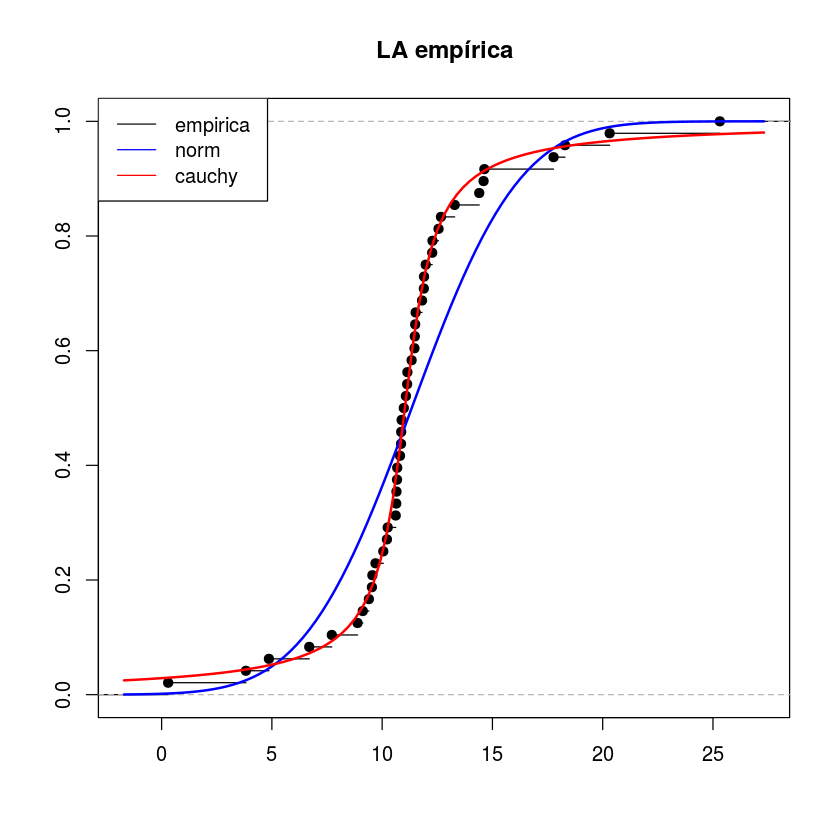

In [146]:
plot(ecdf(mediciones),main="LA empírica",xlab=" ",ylab=" ")
curve(pnorm(x,mean(mediciones),sd(mediciones)),add=T,col="blue",lwd=2)
curve(pcauchy(x,location=median(mediciones)),add=T,col="red",lwd=2)
legend('topleft', legend=c('empirica', 'norm', 'cauchy'), 
       lty=rep(1, 3), lwd=rep(1, 3), col=c('black', 'blue', 'red'))

#### Ej 2.4.a
Los datos parecerían estar distribuídos como una variable aleatoria $X \tilde{} C(0,1)$.

#### Ej 2.4.b
El estimador propuesto es $\hat{\eta_n} = med(\mathbf{x})$

In [148]:
est.eta = median
est.eta.v = est.eta(mediciones)
sprintf('La estimación dada es %f', est.eta.v)

[1] "La estimación dada es 11.029738"

#### Ej 2.4.c

In [154]:
alpha = 0.05
z = qnorm(1 - alpha/2)
Nboot = 1000
est.eta.se.boot = sd(sapply(1:Nboot, function(boot_idx) {
    est.eta(sample(x=mediciones, size=length(mediciones), replace=T))
}))
est.eta.int = c(est.eta.v - z * est.eta.se.boot, est.eta.v + z * est.eta.se.boot)
sprintf('El intervalo bootstrap normal para \\hat{\\eta_n}=(%f, %f)', est.eta.int[1], est.eta.int[2])

[1] "El intervalo bootstrap normal para \\hat{\\eta_n}=(10.584617, 11.474859)"